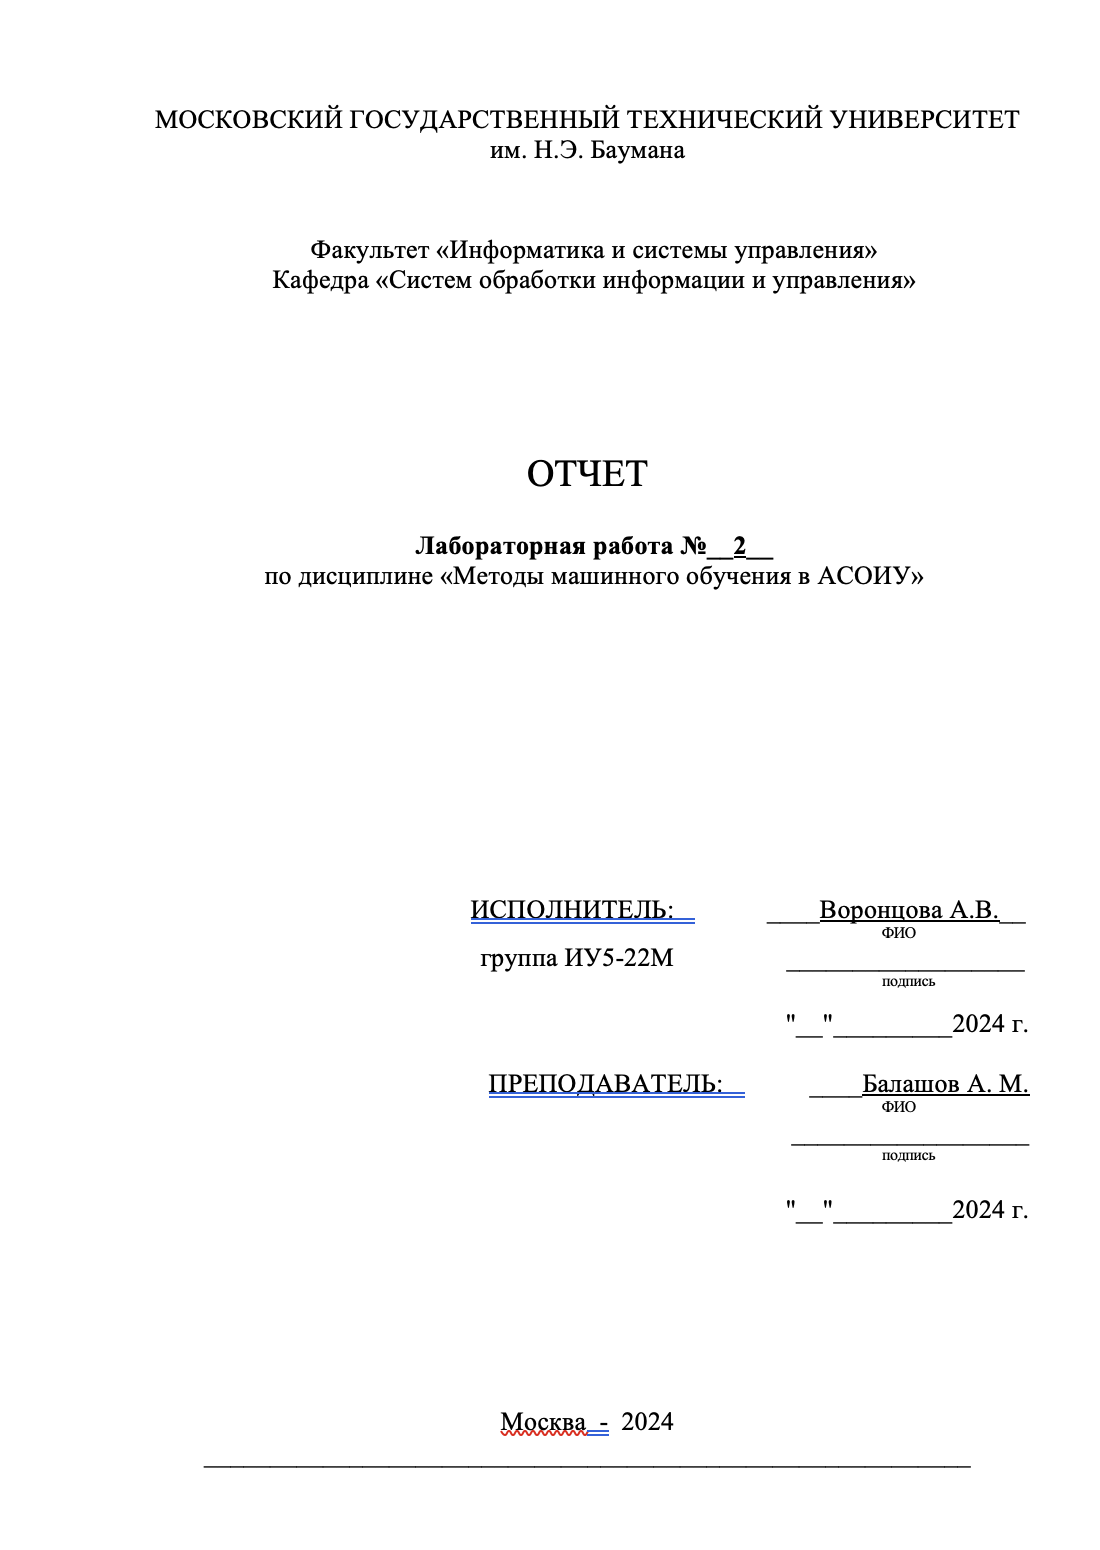

### **Задание:**

Выбрать набор данных (датасет), содержащий категориальные и числовые признаки и пропуски в данных. Для выполнения следующих пунктов можно использовать несколько различных наборов данных (один для обработки пропусков, другой для категориальных признаков и т.д.) Просьба не использовать датасет, на котором данная задача решалась в лекции.

Для выбранного датасета (датасетов) на основе материалов лекций решить следующие задачи:
устранение пропусков в данных;
кодирование категориальных признаков;
нормализация числовых признаков.

In [2]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

# Загрузка датасета
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
data = pd.read_csv(url)

# Устранение пропусков в данных
imputer = SimpleImputer(strategy='mean')
data['Age'] = imputer.fit_transform(data[['Age']])

# Кодирование категориальных признаков

# Создание объекта OneHotEncoder
encoder = OneHotEncoder()

# Преобразование данных
encoded_data = encoder.fit_transform(data)

# Получение имен категорий
feature_names = encoder.get_feature_names_out()
print(feature_names)

encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoded_features = encoder.fit_transform(data[['Sex', 'Embarked']])
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(input_features=['Sex', 'Embarked']))
data = pd.concat([data, encoded_df], axis=1)
data.drop(['Sex', 'Embarked'], axis=1, inplace=True)

# Нормализация числовых признаков
scaler = StandardScaler()
data[['Age', 'Fare']] = scaler.fit_transform(data[['Age', 'Fare']])

# Вывод обновленного датасета
print(data.head())


['PassengerId_1' 'PassengerId_2' 'PassengerId_3' ... 'Embarked_Q'
 'Embarked_S' 'Embarked_nan']
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name       Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris -0.592481      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  0.638789      1      0   
2                             Heikkinen, Miss. Laina -0.284663      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  0.407926      1      0   
4                           Allen, Mr. William Henry  0.407926      0      0   

             Ticket      Fare Cabin  Sex_female  Sex_male  Embarked_C  \
0         A/5 21171 -0.502445   NaN         0.0       1.0         0.0   
1          PC 17599  0.786845   C85         1.0       0.0   

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


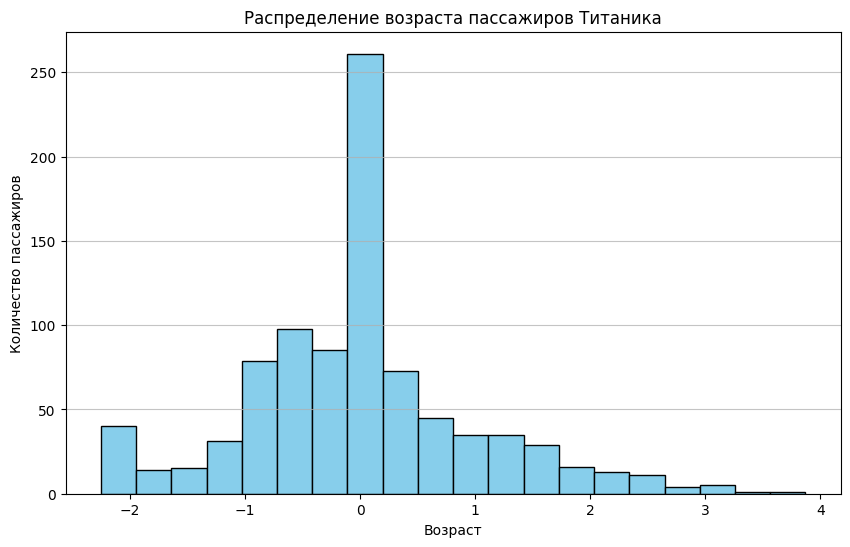

In [3]:
import matplotlib.pyplot as plt

# Построение гистограммы распределения возраста пассажиров
plt.figure(figsize=(10, 6))
plt.hist(data['Age'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Возраст')
plt.ylabel('Количество пассажиров')
plt.title('Распределение возраста пассажиров Титаника')
plt.grid(axis='y', alpha=0.75)
plt.show()
